# Descrição do problema

Ao explorar ofertas relâmpago, quais insights
você pode gerar?

Em conjunto com o desafio, compartilhamos com você um arquivo chamado ofertas_relampago.csv, o qual contém informações sobre os resultados de ofertas do tipo relampago para um período de tempo e um determinado país.
Essas ofertas no mercado livre podem ser vistas da seguinte maneira:

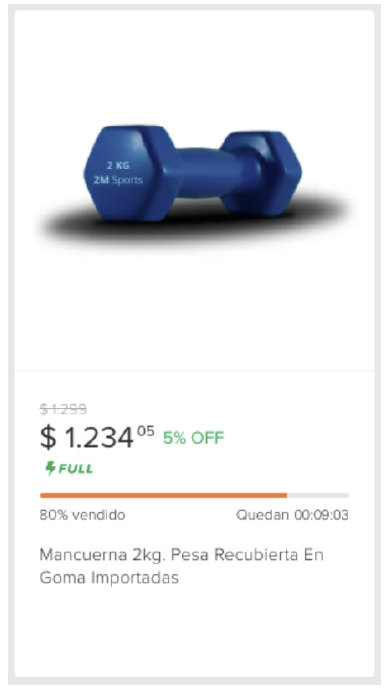

Ou seja, são ofertas que têm uma duração definida de algumas horas e uma porcentagem de
unidades (estoque) comprometidas.

O objetivo deste desafio é fazer uma EDA com esses dados, buscando insights sobre esse tipo de oferta
.
As colunas do conjunto de dados são autoexplicativas, mas você pode nos fazer qualquer pergunta.


Produto final

O produto final deste desafio é um notebook Jupyter com a EDA.

# Perguntas de negócios a serem respondidas:

- Qual o melhor horário para veicular as promoções relâmpago?
- Qual a duração mais adequada para veicular?
- Quais categorias de produtos trouxeram mais receita?
- O tipo de frete faz diferença na hora compra?
- O estoque alocado para a promoção foi suficiente?
- O preços praticados foram efetivos?

## Dados disponíveis:

- OFFER_START_DATE - Data em que iniciou a oferta
- OFFER_START_DTTM - Data em que iniciou a oferta, com horário
- OFFER_FINISH_DTTM - Data em que encerrou a oferta
- OFFER_TYPE - Tipo da oferta, no caso todas são - lightning_deal-
- INVOLVED_STOCK - Quantidade de produtos que entraram em oferta
- REMAINING_STOCK_AFTER_END - Quantidade final de produtos restantes após o término do período de oferta
- SOLD_AMOUNT - Valor total das vendas
- SOLD_QUANTITY - Quantidade de produtos vendidos
- ORIGIN - Origem(Somente com valores A)
- SHIPPING_PAYMENT_TYPE - Tipo do pagamento do frete
- DOM_DOMAIN_AGG1 - Categoria do produto
- VERTICAL - Grupos de categorias semelhantes
- DOMAIN_ID - Código (id) de identificação do produto


## Instalação de módulos e bibliotecas

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib
import warnings
warnings.filterwarnings('ignore')

## Leitura dos dados

In [114]:
offers = pd.read_csv('/content/drive/MyDrive/PSEL e Hackatons/Mercado Livre/ofertas_relampago.csv', encoding='latin1')
offers.sample(5)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
42513,2021-07-02,2021-07-02 13:00:00+00:00,2021-07-02 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,none,STATIONARY,HOME & INDUSTRY,MLM-ADHESIVE_TAPES
42680,2021-07-02,2021-07-02 14:00:00+00:00,2021-07-02 21:00:00+00:00,lightning_deal,32,8,87.59,24.0,A,none,BEAUTY EQUIPMENT,BEAUTY & HEALTH,MLM-BODYWEIGHT_SCALES
2835,2021-06-12,2021-06-12 07:00:00+00:00,2021-06-12 13:00:01+00:00,lightning_deal,15,10,20.91,5.0,NaN,free_shipping,AUTOPARTS,ACC,MLM-VEHICLE_LED_BULBS
37465,2021-07-22,2021-07-22 13:00:00+00:00,2021-07-22 19:00:02+00:00,lightning_deal,15,13,4.27,2.0,NaN,none,APPAREL ACCESORIES,APP & SPORTS,MLM-EARRINGS
28006,2021-06-24,2021-06-24 19:00:00+00:00,2021-06-24 19:00:04+00:00,lightning_deal,10,10,NaN,NaN,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-COMFORTERS


## Análise exploratória de dados

### Características gerais dos dados:

In [115]:
offers.shape

(48746, 13)

In [116]:
offers.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,48746.000000,48746.000000,24579.000000,24579.000000
mean,35.007508,30.565216,51.208898,10.851052
std,206.761058,195.813806,175.254414,45.475305
min,1.000000,-192.000000,0.280000,1.000000
25%,5.000000,4.000000,5.730000,1.000000
50%,10.000000,8.000000,12.420000,3.000000
75%,15.000000,15.000000,30.925000,6.000000
max,9000.000000,8635.000000,4836.570000,1646.000000


In [117]:
offers.dtypes

,0
OFFER_START_DATE,object
OFFER_START_DTTM,object
OFFER_FINISH_DTTM,object
OFFER_TYPE,object
INVOLVED_STOCK,int64
REMAINING_STOCK_AFTER_END,int64
SOLD_AMOUNT,float64
SOLD_QUANTITY,float64
ORIGIN,object
SHIPPING_PAYMENT_TYPE,object


#### Dados faltantes

Observa-se que o conjunto de dados possui dados faltantes. Abaixo segue uma vizualização para entendermos melhor este contexto.
Por meio do gráfico, temos que somente as colunas SOLD_AMOUNT, SOLD_QUANTITY e	ORIGIN possuem NAs. No caso das duas primeiras, podemos sem prejuízo inputar zeros, uma vez que nos casos em que não houveram vendas, a receita é zero, assim como a quantidade. No caso da ORIGIN, será retirada pois possui somente um valor e não possui variabilidade, o que faz com que ela não seja informativa para a análise.   

GridSpec(6, 6)

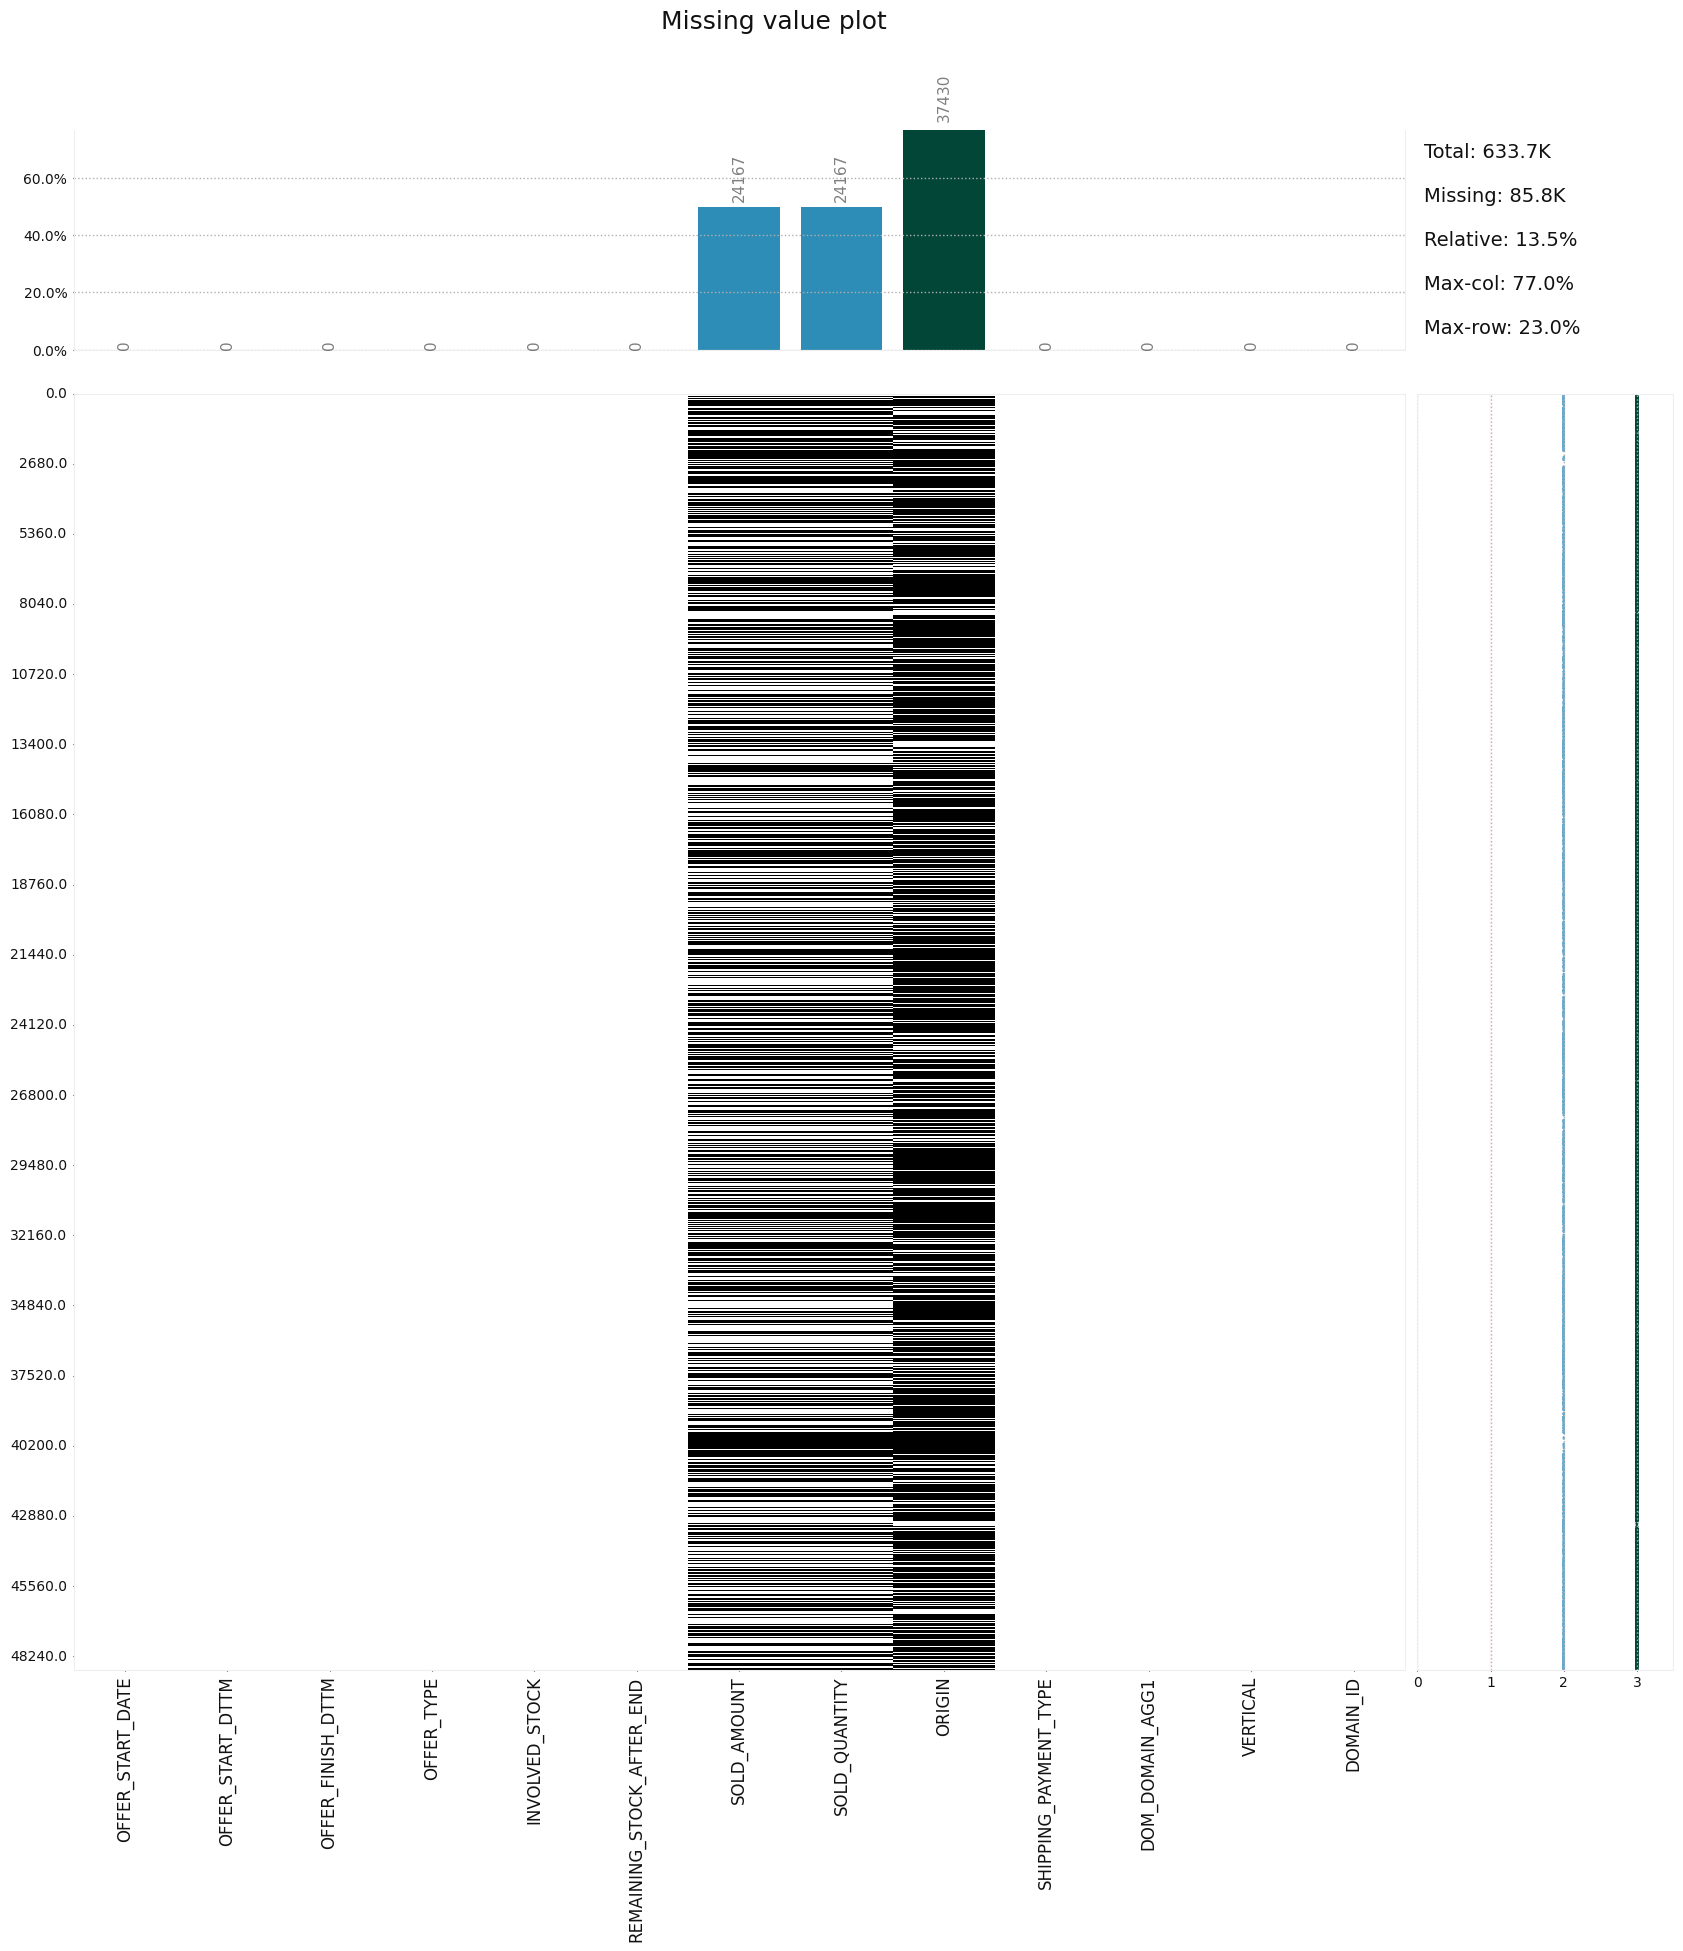

In [118]:
klib.missingval_plot(offers)

In [119]:
offers['SOLD_AMOUNT'] = offers['SOLD_AMOUNT'].fillna(0)
offers['SOLD_QUANTITY'] = offers['SOLD_QUANTITY'].fillna(0)
offers = offers.drop(columns=['ORIGIN'])
offers

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,0.00,0.0,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,none,COMPUTERS,CE,MLM-HEADPHONES
...,...,...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,15,9,16.28,6.0,none,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS
48742,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,5,5,0.00,0.0,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS
48743,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 13:00:03+00:00,lightning_deal,5,3,16.62,2.0,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS
48744,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:00+00:00,lightning_deal,5,1,38.79,4.0,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS


No caso da coluna SHIPPING_PAYMENT_TYPE, os valores são apenas 2, sendo 'free_shipping' e 'none'. Então, será feita uma imputação dos valores 'none' por 'paid_shipping'

In [120]:
offers['SHIPPING_PAYMENT_TYPE'] = offers['SHIPPING_PAYMENT_TYPE'].str.replace('none', 'paid_shipping')
offers

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,paid_shipping,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,0.00,0.0,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,paid_shipping,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,paid_shipping,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,paid_shipping,COMPUTERS,CE,MLM-HEADPHONES
...,...,...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,15,9,16.28,6.0,paid_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS
48742,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,5,5,0.00,0.0,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS
48743,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 13:00:03+00:00,lightning_deal,5,3,16.62,2.0,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS
48744,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:00+00:00,lightning_deal,5,1,38.79,4.0,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS


### Características específicas dos dados:

Características das colunas categóricas:

 - OFFER_TYPE: 100% são ofertas relâmpago
 - SHIPPING_PAYMENT_TYPE: 54.68% São envios grátis
 - DOM_DOMAIN_AGG1: 36 categorias, com a mais representativa sendo HOME&DECOR  com uma proporção de 13.83%
 - VERTICAL: 9 categorias, com o conjunto APP & SPORTS, HOME & INDUSTRY, CE e BEAUTY & HEALTH representando juntas 82.12% do total
 - DOMAIN_ID: 1266 categorias com proporções dispersas(entre 0.0021% e 3.61%)

In [121]:
def category_analysis(df, col):
    print(f"{col}")
    print(f"Quantidade de categorias: {df[col].nunique()}")
    print("Categorias desta variável:")
    print(df[col].value_counts(normalize=True, dropna=False))
    print()

categorical = ['OFFER_TYPE', 'SHIPPING_PAYMENT_TYPE', 'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID']

for col in categorical:
    category_analysis(offers, col)


OFFER_TYPE
Quantidade de categorias: 1
Categorias desta variável:
OFFER_TYPE
lightning_deal    1.0
Name: proportion, dtype: float64

SHIPPING_PAYMENT_TYPE
Quantidade de categorias: 2
Categorias desta variável:
SHIPPING_PAYMENT_TYPE
free_shipping    0.546876
paid_shipping    0.453124
Name: proportion, dtype: float64

DOM_DOMAIN_AGG1
Quantidade de categorias: 36
Categorias desta variável:
DOM_DOMAIN_AGG1
HOME&DECOR                      0.138309
APPAREL ACCESORIES              0.089997
APPAREL                         0.079104
COMPUTERS                       0.077340
SPORTS                          0.067472
PHARMACEUTICS                   0.062262
ELECTRONICS                     0.061913
PERSONAL CARE                   0.061872
MOBILE                          0.037767
AUTOPARTS                       0.034793
FOOTWEAR                        0.031100
TOOLS AND CONSTRUCTION          0.030587
TOYS AND GAMES                  0.029254
STATIONARY                      0.025828
INDUSTRY            

### Criação de variáveis e transformações

In [122]:
cond = (offers['SOLD_AMOUNT'] != 0) & (offers['SOLD_QUANTITY'] != 0) # Garantindo que não exista divisões por 0
offers['UNIT_PRICE'] = np.where(cond, offers['SOLD_AMOUNT'] / offers['SOLD_QUANTITY'], 0)
offers["PRODUCT"] = offers["DOMAIN_ID"].str.split("-").str[1]

In [123]:
offers["OFFER_START_DTTM"] = pd.to_datetime(offers["OFFER_START_DTTM"])
offers["OFFER_FINISH_DTTM"] = pd.to_datetime(offers["OFFER_FINISH_DTTM"])

## Análises

#### Quantidade de ofertas por dia

As quantidades de ofertas por dia tiveram uma tendência de alta com excessão de 30/06/2021 quando a série apresentou uma baixa significativa.

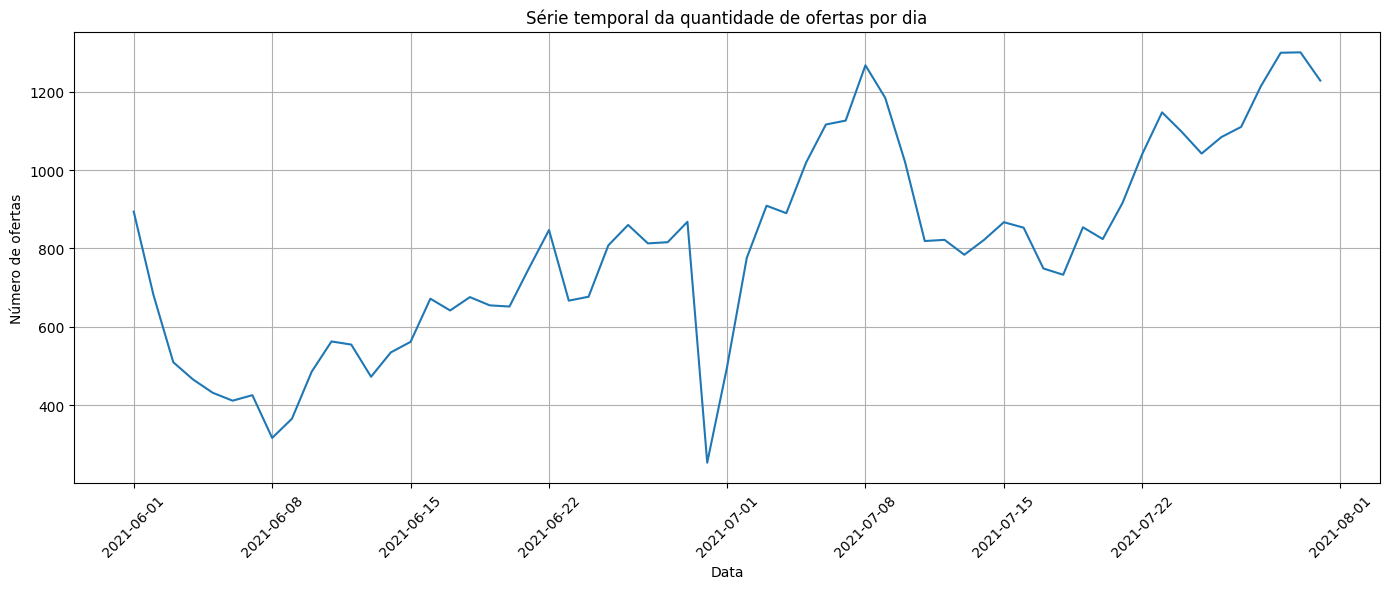

In [124]:
offers["OFFER_START_DATE"] = offers["OFFER_START_DTTM"].dt.date

offers_count = offers.groupby("OFFER_START_DATE").size().reset_index(name="NUM_OFFERS")

plt.figure(figsize=(14, 6))
sns.lineplot(data=offers_count, x="OFFER_START_DATE", y="NUM_OFFERS")

plt.title("Série temporal da quantidade de ofertas por dia")
plt.xlabel("Data")
plt.ylabel("Número de ofertas")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [125]:
print(offers_count.describe())
offers_count.sort_values(by='NUM_OFFERS', ascending=True).head(10)

        NUM_OFFERS
count    61.000000
mean    799.114754
std     262.296213
min     254.000000
25%     642.000000
50%     816.000000
75%    1019.000000
max    1300.000000


,OFFER_START_DATE,NUM_OFFERS
29,2021-06-30,254
7,2021-06-08,317
8,2021-06-09,366
5,2021-06-06,412
6,2021-06-07,426
4,2021-06-05,432
3,2021-06-04,466
12,2021-06-13,473
9,2021-06-10,486
30,2021-07-01,497


#### Duração da oferta relâmpago

A média de duração foi de 5.70 horas, mas notamos que esta média foi puxada por um outlier, de 104 horas(mais de 4 dias), o que não configura como "oferta relâmpago" e será tratada como um erro processual que podemos retirar sem nenhum prejuízo às análises.

In [126]:
offers['OFFER_DURATION'] = (offers["OFFER_FINISH_DTTM"] - offers["OFFER_START_DTTM"]).dt.total_seconds() / 3600
offers['OFFER_DURATION'].describe()

,OFFER_DURATION
count,48746.000000
mean,5.708344
std,2.113096
min,0.000000
25%,6.000000
50%,6.000556
75%,6.004444
max,104.752500


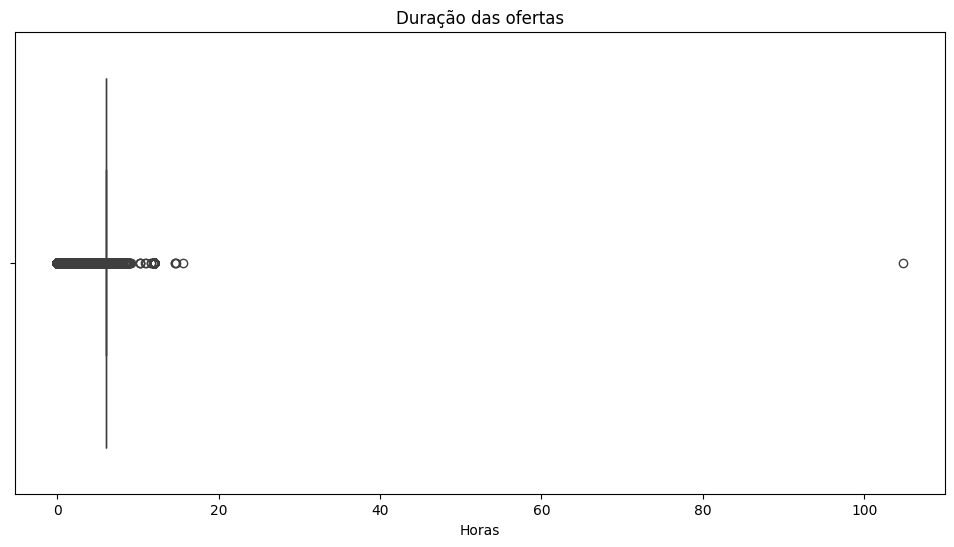

In [127]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = offers, x = 'OFFER_DURATION')
plt.title("Duração das ofertas")
plt.xlabel("Horas")
plt.ylabel("")
plt.show()

In [128]:
# Retira o outlier de duração
offers = offers[offers['OFFER_DURATION'] <= 24]  # Ofertas que duraram até um dia
offers['OFFER_DURATION'].describe()

,OFFER_DURATION
count,48745.000000
mean,5.706313
std,2.064949
min,0.000000
25%,6.000000
50%,6.000556
75%,6.004444
max,15.619167


Verificamos se alguma oferta durou menos de 1 minuto e se gerou receita. Tivemos que 3814 ofertas com essa característica, o que parece ser atípico, mas como geraram receita, serão mantidas na base. Por outro lado, dessas que duraram menos de 1 minuto, houveram 1314 que duraram 0 minutos e não geraram receita e portanto serão tratadas como erros e retiradas.

In [129]:
# Verificando se alguma oferta durou menos 1 min
(((offers["OFFER_FINISH_DTTM"] - offers["OFFER_START_DTTM"]).dt.total_seconds() / 60) < 1).value_counts()

,count
False,44931
True,3814


In [130]:
offers[offers['OFFER_DURATION'] < 1]['SOLD_AMOUNT'].sum()

np.float64(7188.45)

In [131]:
# Verificando se alguma oferta durou 0 minutos
(offers['OFFER_DURATION'] == 0).value_counts()

,count
OFFER_DURATION,
False,47431
True,1314


In [132]:
offers[offers['OFFER_DURATION'] == 0]['SOLD_AMOUNT'].sum()

np.float64(0.0)

In [133]:
offers = offers[offers['OFFER_DURATION'] > 0]

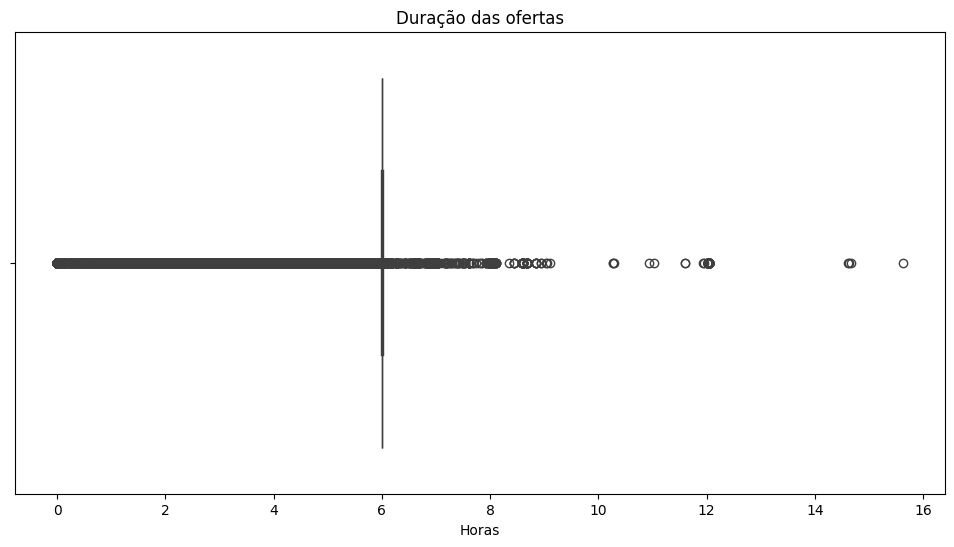

In [134]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = offers, x = 'OFFER_DURATION')
plt.title("Duração das ofertas")
plt.xlabel("Horas")
plt.ylabel("")
plt.show()

Após a criação das faixas de duração para as promoções, nota-se que a duração ideal para veiculação fica entre 6h e 9h

In [135]:
offers['OFFER_DURATION_CAT'] = pd.cut(
    offers['OFFER_DURATION'],
    bins=[0, 3, 6, 9, 12, 15, 18],
    labels=['0-3h', '3-6h', '6-9h', '9-12h', '12-15h', '15-18h'],
    right=False,
    include_lowest=True
)

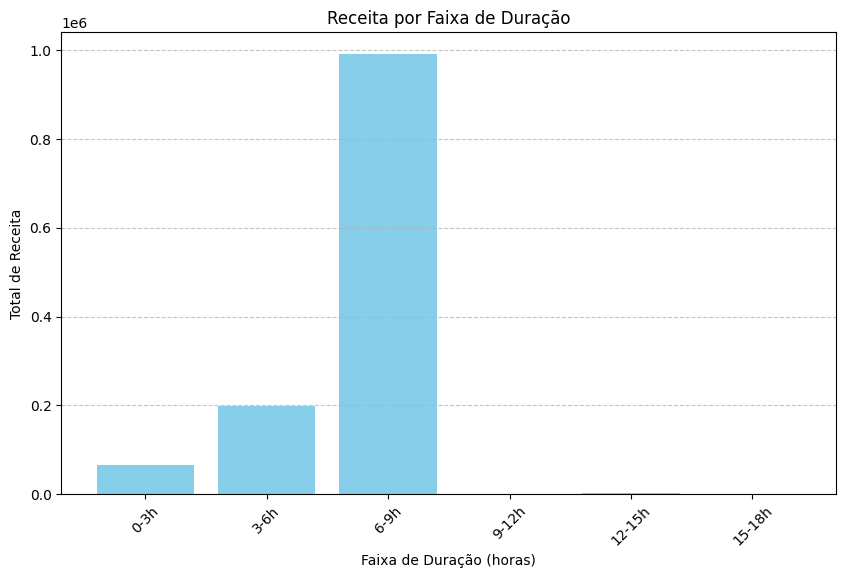

In [136]:
df_plot = offers.groupby('OFFER_DURATION_CAT')['SOLD_AMOUNT'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(df_plot['OFFER_DURATION_CAT'], df_plot['SOLD_AMOUNT'], color='skyblue')

plt.xlabel('Faixa de Duração (horas)')
plt.ylabel('Total de Receita')
plt.title('Receita por Faixa de Duração')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Performance por hora do dia

É possível notarmos que apesar de a quantidade de vendas ser maior das 9h às 22, a receita é alavancada entre a 1h e às 3h. Isso nos sugere que produtos mais caros foram comprados com maior frequência pela madrugada.

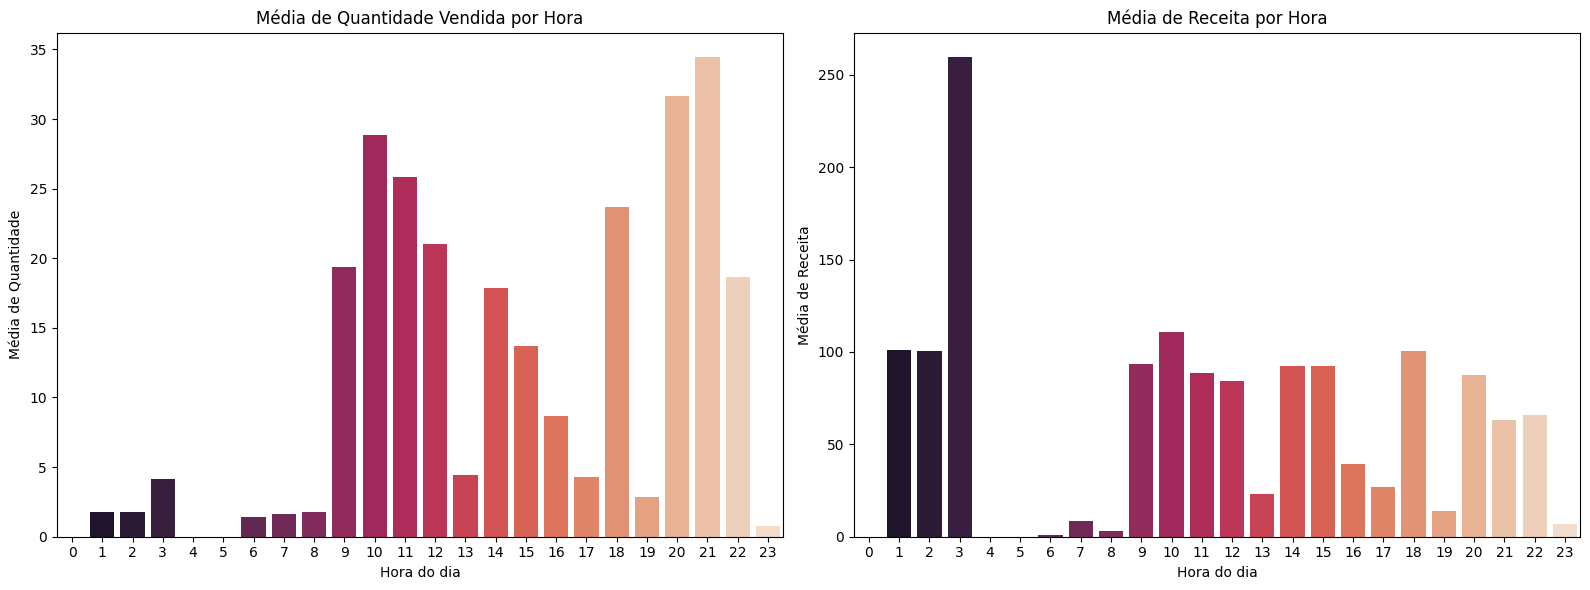

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns


offers["HOUR"] = offers["OFFER_START_DTTM"].dt.hour


hourly_avg_qtt = offers.groupby("HOUR")["SOLD_QUANTITY"].mean()
hourly_avg_amt = offers.groupby("HOUR")["SOLD_AMOUNT"].mean()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

sns.barplot(x=hourly_avg_qtt.index, y=hourly_avg_qtt.values, palette="rocket", ax=ax1)
ax1.set_title("Média de Quantidade Vendida por Hora")
ax1.set_xlabel("Hora do dia")
ax1.set_ylabel("Média de Quantidade")

sns.barplot(x=hourly_avg_amt.index, y=hourly_avg_amt.values, palette="rocket", ax=ax2)
ax2.set_title("Média de Receita por Hora")
ax2.set_xlabel("Hora do dia")
ax2.set_ylabel("Média de Receita")

plt.tight_layout()
plt.show()


#### Heatmap por hora e dia da semana

Podemos observar que a taxa de conversão não se mostra muito concentrada, mas sim está dispersa tanto entre os dias da semana quanto entre as horas do dia.

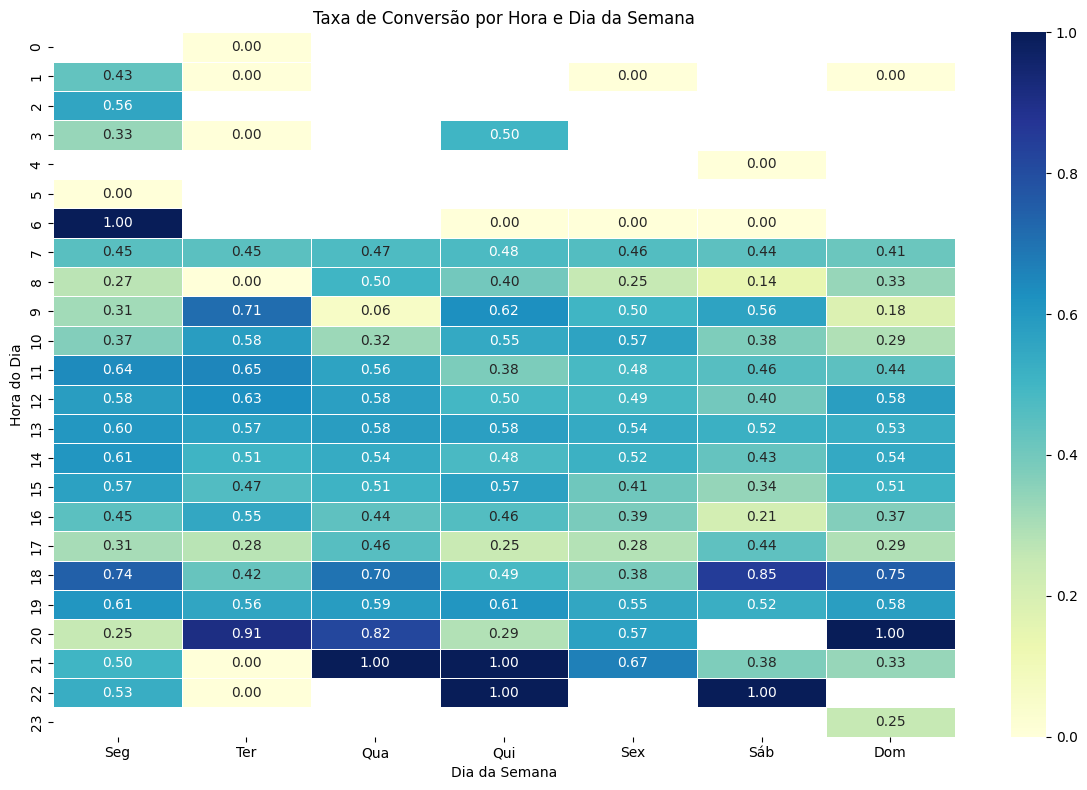

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

offers["HOUR"] = offers["OFFER_START_DTTM"].dt.hour
offers["WEEK_DAY"] = offers["OFFER_START_DTTM"].dt.dayofweek  # 0 = segunda, 6 = domingo

dias_labels = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
offers["WEEK_DAY_NAME"] = offers["WEEK_DAY"].apply(lambda x: dias_labels[x])

offers["FLAG_SOLD"] = (offers["SOLD_QUANTITY"] > 0).astype(int)
offers["OFFER_ID"] = range(1, len(offers) + 1)
conversion_df = offers.groupby(["HOUR", "WEEK_DAY_NAME"]).agg(
    SOLD_QUANTITY=("FLAG_SOLD", "sum"),
    NUM_PROMOS=("OFFER_ID", "count")
).reset_index()

conversion_df["CONVERSION_RATE"] = conversion_df["SOLD_QUANTITY"] / conversion_df["NUM_PROMOS"]

heatmap_conv = conversion_df.pivot(index="HOUR", columns="WEEK_DAY_NAME", values="CONVERSION_RATE")

heatmap_conv = heatmap_conv[dias_labels]

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_conv, cmap="YlGnBu", linewidths=0.5, annot=True, fmt=".2f")
plt.title("Taxa de Conversão por Hora e Dia da Semana")
plt.xlabel("Dia da Semana")
plt.ylabel("Hora do Dia")
plt.tight_layout()
plt.show()



Quantidade de vendas e receita por hora e dia da semana

As métricas de receita e quantidade nos mostram no entanto que existe um período no qual existe mais demanda e que por consequencia gera mais receita, que é aproximadamente das 9h às 15h e às 7h e 19h, independente do dia da semana. Esses seriam naturalmente os horários mais indicado para as ofertas relâmpago serem veiculadas.

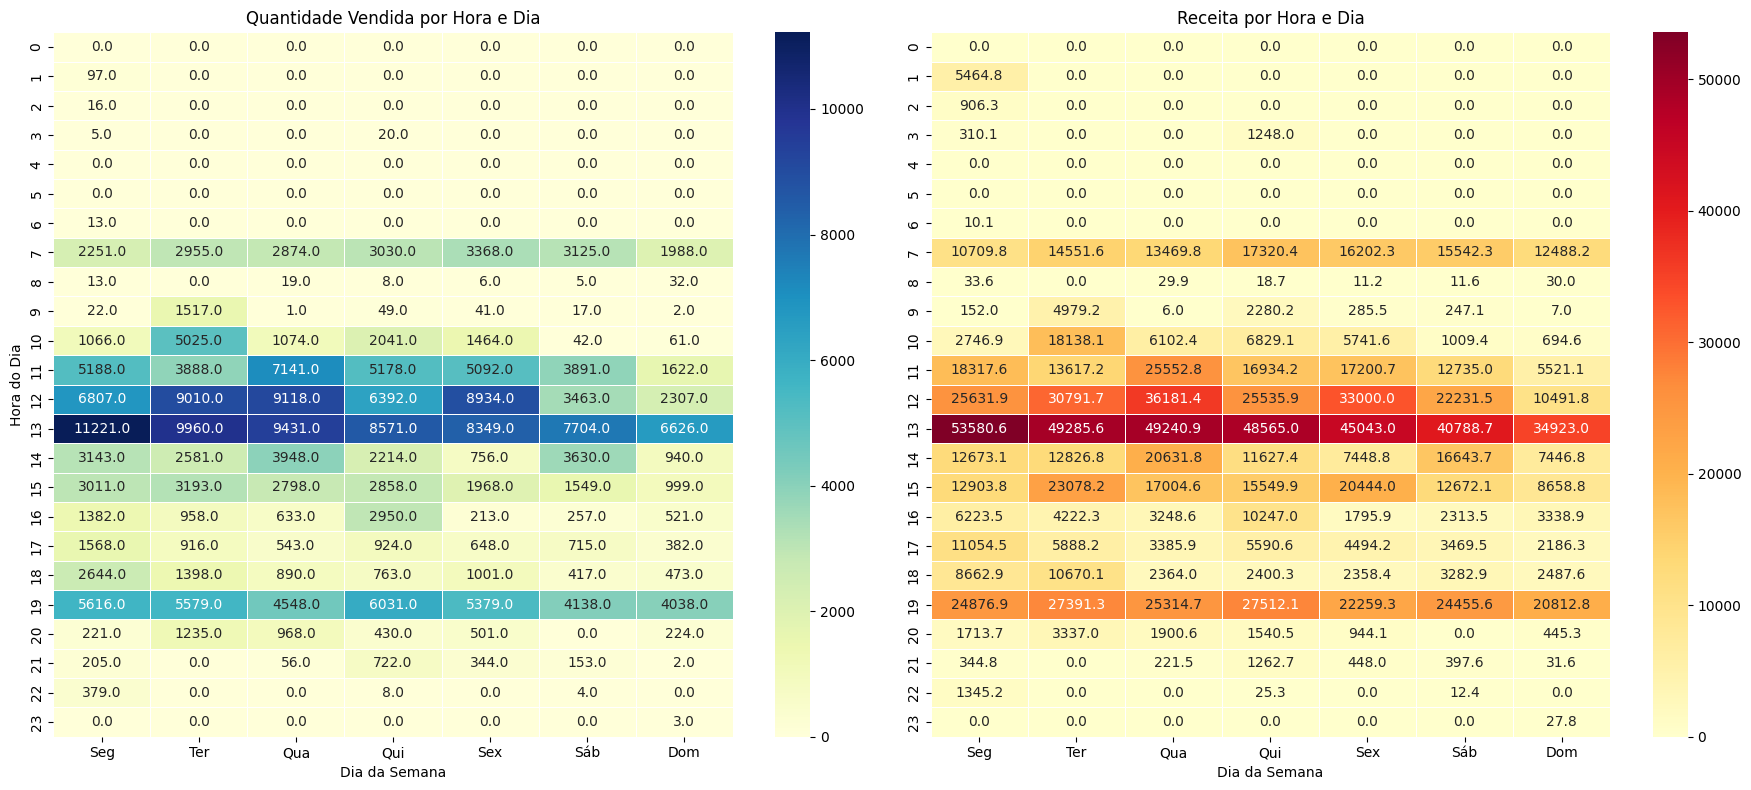

In [139]:
offers["HOUR"] = offers["OFFER_START_DTTM"].dt.hour
offers["WEEK_DAY"] = offers["OFFER_START_DTTM"].dt.dayofweek  # 0 = segunda, 6 = domingo

dias_labels = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
offers["WEEK_DAY_NAME"] = offers["WEEK_DAY"].apply(lambda x: dias_labels[x])

heatmap_qtt = offers.groupby(["HOUR", "WEEK_DAY_NAME"])["SOLD_QUANTITY"].sum().unstack().fillna(0)
heatmap_amt = offers.groupby(["HOUR", "WEEK_DAY_NAME"])["SOLD_AMOUNT"].sum().unstack().fillna(0)

heatmap_qtt = heatmap_qtt[dias_labels]
heatmap_amt = heatmap_amt[dias_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharey=False)


sns.heatmap(heatmap_qtt, cmap="YlGnBu", linewidths=0.5, annot=True, fmt=".1f", ax=ax1)
ax1.set_title("Quantidade Vendida por Hora e Dia")
ax1.set_xlabel("Dia da Semana")
ax1.set_ylabel("Hora do Dia")

sns.heatmap(heatmap_amt, cmap="YlOrRd", linewidths=0.5, annot=True, fmt=".1f", ax=ax2)
ax2.set_title("Receita por Hora e Dia")
ax2.set_xlabel("Dia da Semana")
ax2.set_ylabel("")

plt.tight_layout()
plt.show()


#### Comparação por tipo de envio: Grátis vs Pago

A princípio temos que de maneira geral os tipos de envio parecem não terem diferemças, mas ao adentrar-se por vertical, nota-se que em CE(Computer & Electronics), o frete foi gratuito na maior parte das vendas, o que pode ser explicado pelo fato de o ticket médio dessa vertical ser alto.

<Axes: xlabel='SHIPPING_PAYMENT_TYPE', ylabel='SOLD_AMOUNT'>

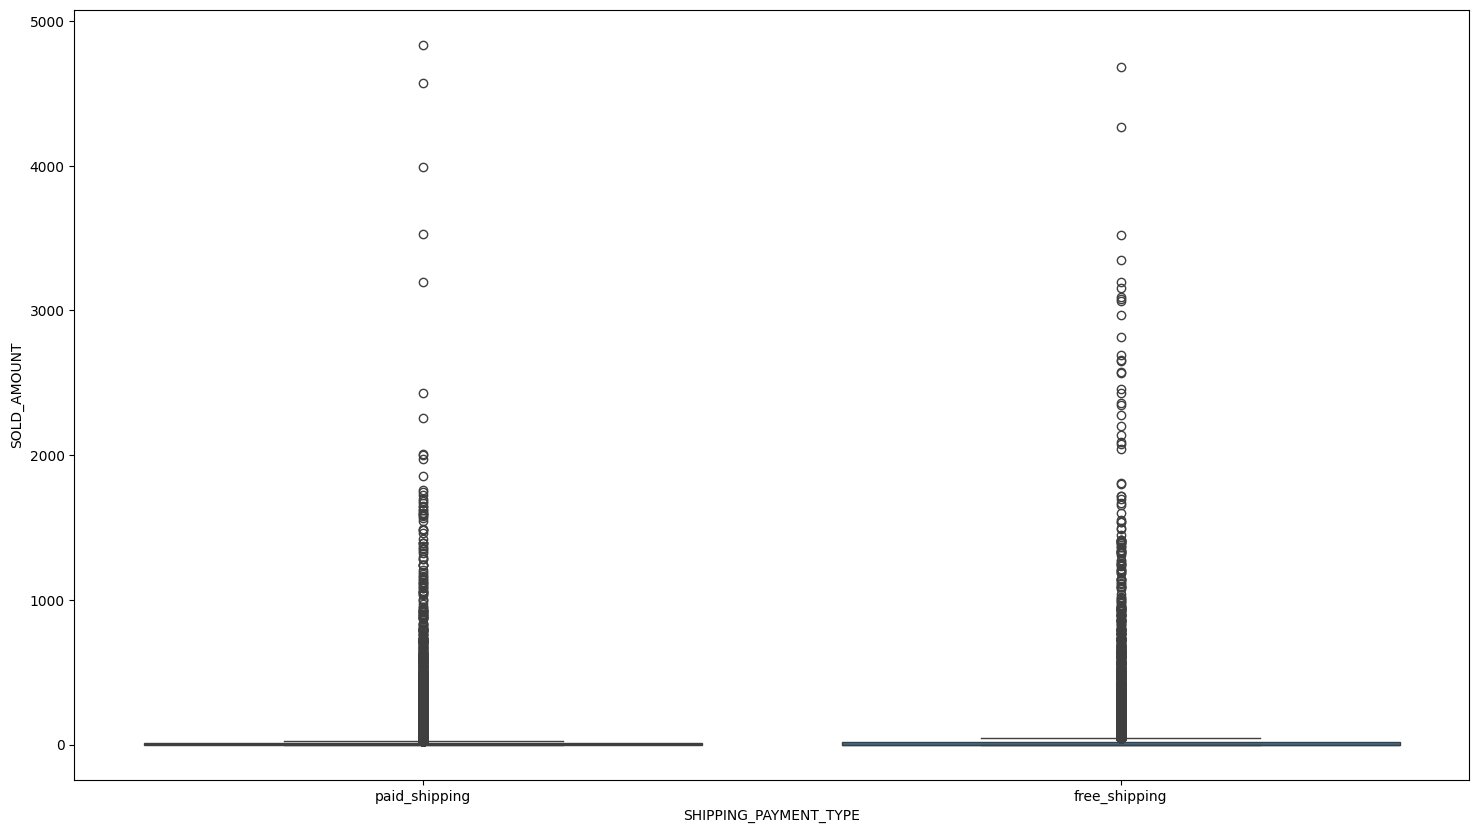

In [140]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=offers, x="SHIPPING_PAYMENT_TYPE", y="SOLD_AMOUNT")

<Axes: xlabel='VERTICAL', ylabel='SOLD_AMOUNT'>

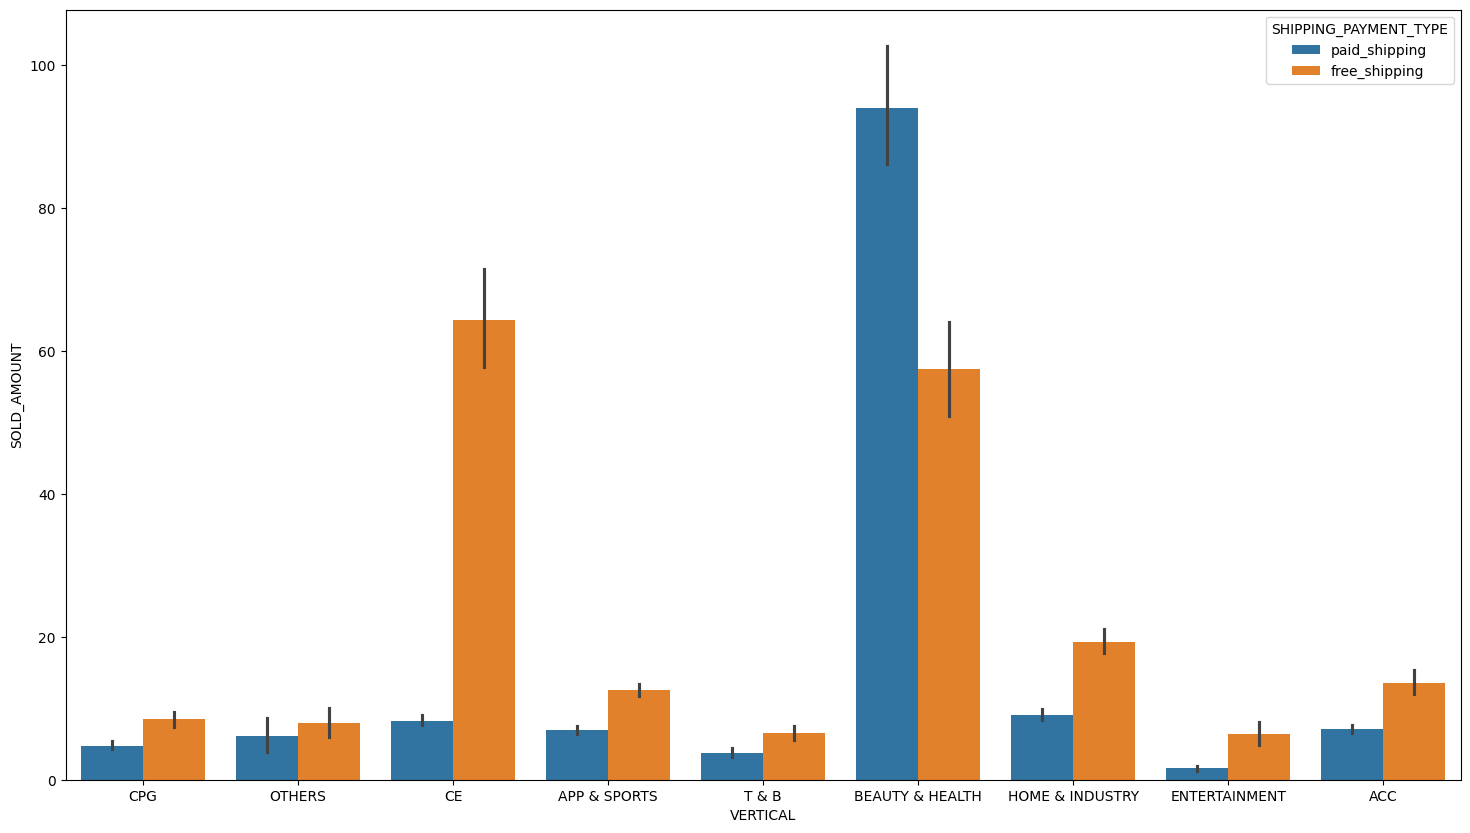

In [141]:
plt.figure(figsize=(18, 10))
sns.barplot(data=offers, x="VERTICAL", y="SOLD_AMOUNT", hue="SHIPPING_PAYMENT_TYPE")

#### Análise de estoque

Observando o balanço de estoque por produto, nota-se que os produtos que mais tiveram demanda foram principalmente produtos de saúde e proteção individual como máscaras e luvas descartáveis. Os valores de saldo de estoque podem estar negativos por conta de as vendas terem consumido além do estoque que estava planejado para a promoção, também estoque que não estava promocionado.


In [145]:
(offers['REMAINING_STOCK_AFTER_END'] < 0).value_counts() # Quantidade de estoque negativo ao final da promoção

,count
REMAINING_STOCK_AFTER_END,
False,46158
True,1273


In [146]:
stock = offers.groupby('PRODUCT').agg({'INVOLVED_STOCK': 'max', 'SOLD_QUANTITY': 'sum'}).reset_index()
stock['STOCK_BALANCE'] = stock['INVOLVED_STOCK'] - stock['SOLD_QUANTITY']
stock['STOCK_BALANCE_PCT'] = stock['STOCK_BALANCE'] / stock['INVOLVED_STOCK'] * 100
stock.sort_values(by='STOCK_BALANCE', ascending=True).head(10)

,PRODUCT,INVOLVED_STOCK,SOLD_QUANTITY,STOCK_BALANCE,STOCK_BALANCE_PCT
1084,SURGICAL_AND_INDUSTRIAL_MASKS,8000,141369.0,-133369.0,-1667.112500
363,DISPOSABLE_GLOVES,3000,13477.0,-10477.0,-349.233333
582,HEADPHONES,450,4447.0,-3997.0,-888.222222
854,OXIMETERS,5000,8632.0,-3632.0,-72.640000
715,LED_STRIPS,170,1983.0,-1813.0,-1066.470588
260,CHRISTMAS_LIGHTS,20,1686.0,-1666.0,-8330.000000
1184,VEHICLE_LED_BULBS,15,1460.0,-1445.0,-9633.333333
1130,THERMOSES,300,1590.0,-1290.0,-430.000000
1079,SUNGLASSES,300,1506.0,-1206.0,-402.000000
1101,TABLE_AND_DESK_LAMPS,203,1357.0,-1154.0,-568.472906


#### Análise de preço

Com relação aos preços praticados, nota-se que os produtos que possuem preços mais baixos geram maior quantidade de vendas

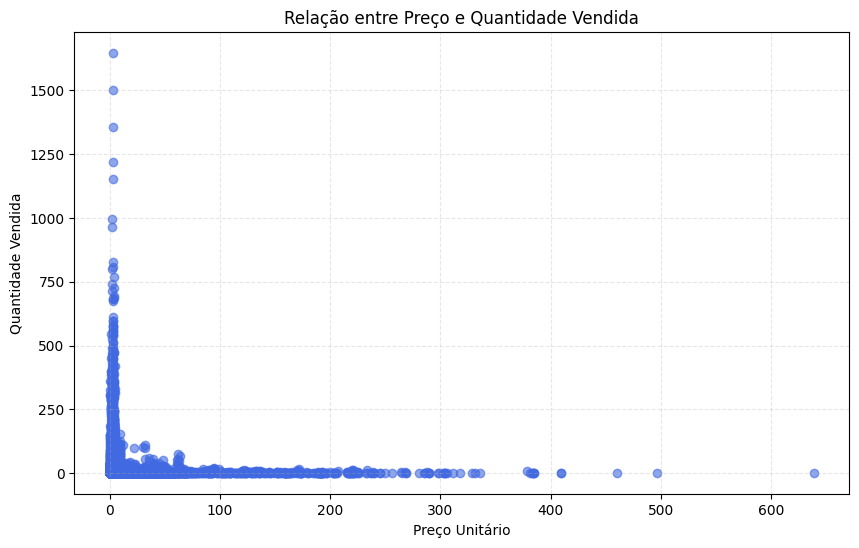

In [150]:
plt.figure(figsize=(10, 6))
plt.scatter(
    x=offers['UNIT_PRICE'],
    y=offers['SOLD_QUANTITY'],
    alpha=0.6,
    color='royalblue'
)

plt.xlabel('Preço Unitário')
plt.ylabel('Quantidade Vendida')
plt.title('Relação entre Preço e Quantidade Vendida')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

A receita porém, é compensada pelos itens mais caros. E como tanto a quantidade vendida quanto a receita não possuem uma relação com o preço, são necessárias mais análises para entender se os preços praticados foram adequados.

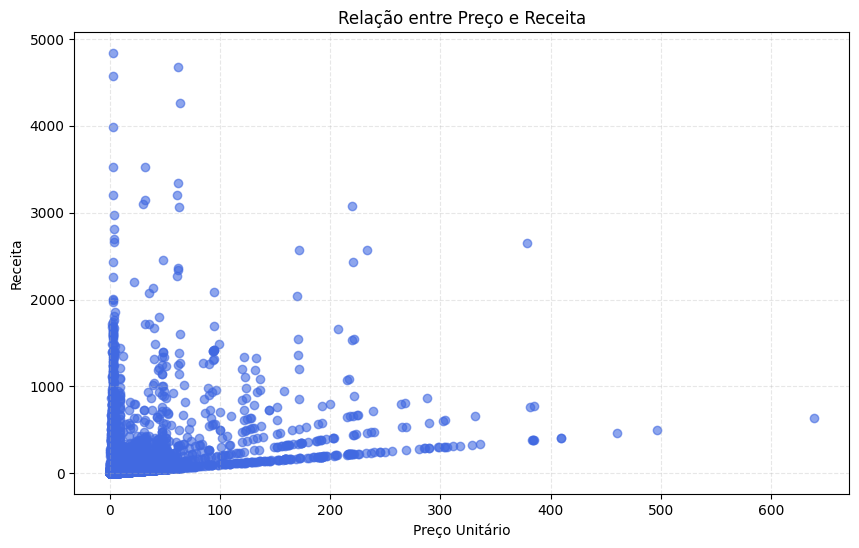

In [151]:
plt.figure(figsize=(10, 6))
plt.scatter(
    x=offers['UNIT_PRICE'],
    y=offers['SOLD_AMOUNT'],
    alpha=0.6,
    color='royalblue'
)

plt.xlabel('Preço Unitário')
plt.ylabel('Receita')
plt.title('Relação entre Preço e Receita')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

### Pareto - Impacto das categorias na receita

In [152]:
def pareto_plot(df, cat_var, val_var):

    pareto_df = df.groupby(cat_var)[val_var].sum().sort_values(ascending=False).reset_index()
    pareto_df["perc_acumulado"] = pareto_df[val_var].cumsum() / pareto_df[val_var].sum() * 100

    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.bar(pareto_df[cat_var], pareto_df[val_var], color="blue")
    ax1.set_ylabel(f"Soma de {val_var}")
    ax1.set_xticklabels(pareto_df[cat_var], rotation=90, ha="right")

    ax2 = ax1.twinx()
    ax2.plot(pareto_df[cat_var], pareto_df["perc_acumulado"], color="red", marker="o", linestyle='--')
    ax2.set_ylabel("Percentual Acumulado (%)")
    ax2.set_ylim(0, 110)
    ax2.axhline(80, color='black', linestyle='--', linewidth=1)  # Linha de 80%

    plt.title(f"Gráfico de Pareto para {cat_var}")
    plt.tight_layout()

    return plt.show(), pareto_df



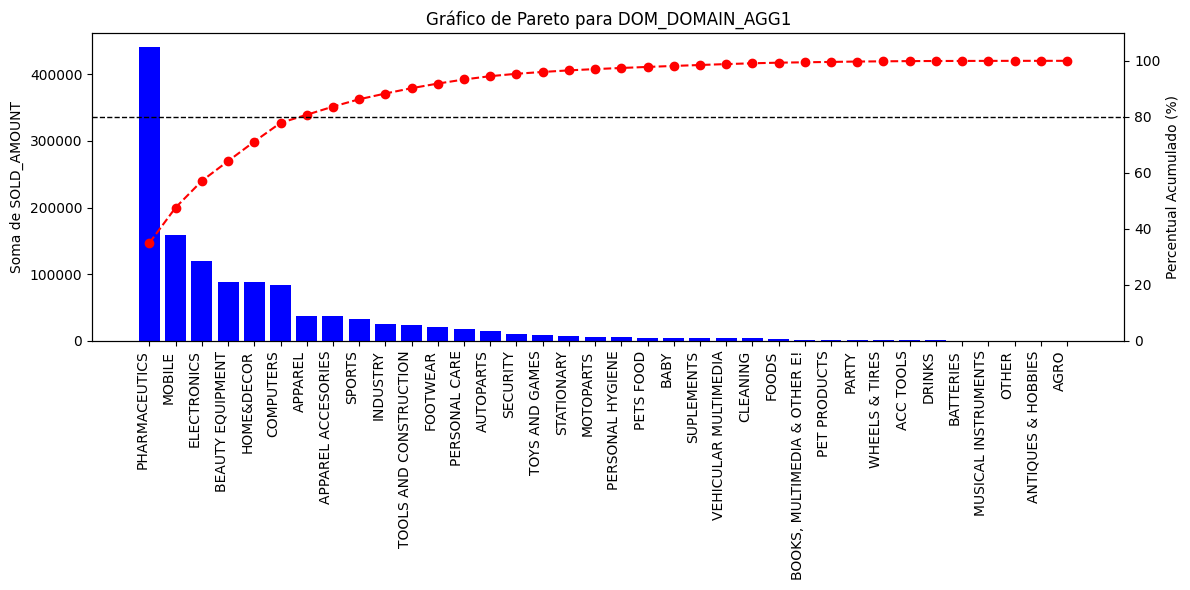

(None,
                  DOM_DOMAIN_AGG1  SOLD_AMOUNT  perc_acumulado
 0                  PHARMACEUTICS    440216.74       34.974935
 1                         MOBILE    158992.21       47.606763
 2                    ELECTRONICS    119853.95       57.129082
 3               BEAUTY EQUIPMENT     88830.25       64.186588
 4                     HOME&DECOR     87761.65       71.159194
 5                      COMPUTERS     83941.78       77.828314
 6                        APPAREL     36569.90       80.733769
 7             APPAREL ACCESORIES     36565.63       83.638884
 8                         SPORTS     33118.70       86.270144
 9                       INDUSTRY     25874.22       88.325834
 10        TOOLS AND CONSTRUCTION     23977.70       90.230846
 11                      FOOTWEAR     20685.71       91.874313
 12                 PERSONAL CARE     18380.28       93.334614
 13                     AUTOPARTS     14905.65       94.518858
 14                      SECURITY     10789.33  

In [153]:
pareto_plot(offers, 'DOM_DOMAIN_AGG1', 'SOLD_AMOUNT')

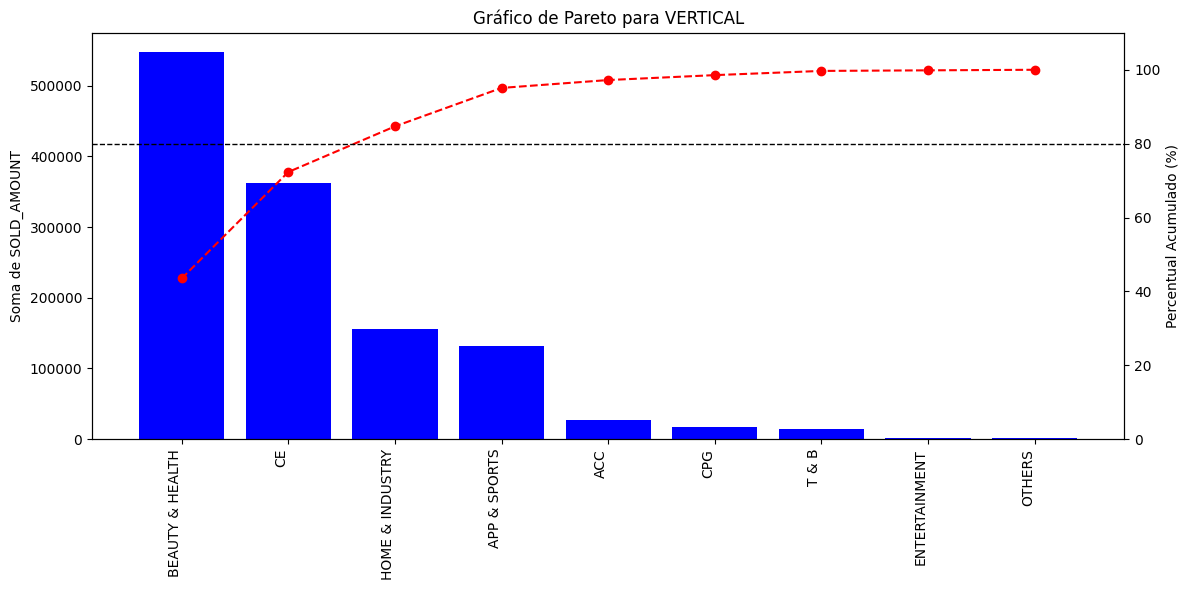

(None,
           VERTICAL  SOLD_AMOUNT  perc_acumulado
 0  BEAUTY & HEALTH    547427.27       43.492742
 1               CE    362787.94       72.316009
 2  HOME & INDUSTRY    155518.68       84.671867
 3     APP & SPORTS    131101.36       95.087786
 4              ACC     26819.98       97.218616
 5              CPG     16787.68       98.552386
 6            T & B     14302.78       99.688733
 7    ENTERTAINMENT      1988.57       99.846723
 8           OTHERS      1929.24      100.000000)

In [154]:
pareto_plot(offers, 'VERTICAL', 'SOLD_AMOUNT')

### Produtos

Quando analisamos especificamente os produtos, o destaque fica para os materiais hospitalares e de saúde, como máscaras, luvas descartáveis e oxímetros com uma participação significativa na proporção dos produtos. Isso provavelmente se deve à pandemia de COVID-19 que ocorreu em 2020 e 2021.

In [155]:
pareto_df_products = offers.groupby('PRODUCT')['SOLD_AMOUNT'].sum().sort_values(ascending=False).reset_index()
pareto_df_products["PERC_CUM"] = pareto_df_products['SOLD_AMOUNT'].cumsum() / pareto_df_products['SOLD_AMOUNT'].sum() * 100
pareto_df_products.head(10)

,PRODUCT,SOLD_AMOUNT,PERC_CUM
0,SURGICAL_AND_INDUSTRIAL_MASKS,410363.30,32.603098
1,CELLPHONES,111678.79,41.475906
2,TELEVISIONS,66366.08,46.748648
3,DISPOSABLE_GLOVES,55365.39,51.147392
4,HEADPHONES,29628.06,53.501323
5,SMARTWATCHES,21572.06,55.215209
6,TABLETS,19123.19,56.734534
7,OXIMETERS,17606.61,58.133368
8,NOTEBOOKS,17598.28,59.531540
9,SNEAKERS,12004.28,60.485272


#### Produtos mais ofertados

In [166]:
# produtos mais ofertados
product_n_offers = offers['PRODUCT'].value_counts().reset_index()
product_n_offers.rename(columns={'count': 'N_OFFERS'}, inplace=True)
product_n_offers

,PRODUCT,N_OFFERS
0,SURGICAL_AND_INDUSTRIAL_MASKS,1730
1,HEADPHONES,750
2,LED_STRIPS,508
3,VEHICLE_LED_BULBS,445
4,SNEAKERS,440
...,...,...
1250,HOOD_HINGES,1
1251,WHEEL_HUBS,1
1252,TACTICAL_HANDCUFFS,1
1253,SIDEBOARDS,1


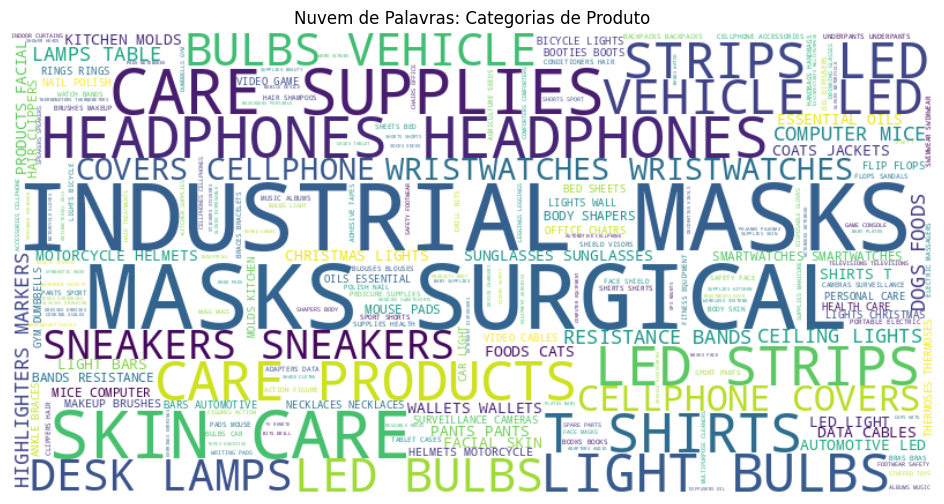

In [156]:
from wordcloud import WordCloud

text = " ".join(offers["PRODUCT"].str.replace("_", " "))

wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuvem de Palavras: Categorias de Produto")
plt.show()

In [163]:
amount_by_product = offers.groupby('PRODUCT').agg({'SOLD_AMOUNT':'sum', 'SOLD_QUANTITY': 'sum'})
amount_by_product = amount_by_product.sort_values('SOLD_AMOUNT', ascending=False).reset_index()
amount_by_product

,PRODUCT,SOLD_AMOUNT,SOLD_QUANTITY
0,SURGICAL_AND_INDUSTRIAL_MASKS,410363.30,141369.0
1,CELLPHONES,111678.79,1769.0
2,TELEVISIONS,66366.08,451.0
3,DISPOSABLE_GLOVES,55365.39,13477.0
4,HEADPHONES,29628.06,4447.0
...,...,...,...
1250,FETAL_DOPPLERS,0.00,0.0
1251,FENCE_PRIVACY_TAPES,0.00,0.0
1252,FOOD_STORAGE_CONTAINERS,0.00,0.0
1253,FOOD_AND_DRINK_COLORINGS,0.00,0.0


In [168]:
amount_by_product = amount_by_product.merge(product_n_offers, on='PRODUCT')
amount_by_product

,PRODUCT,SOLD_AMOUNT,SOLD_QUANTITY,N_OFFERS
0,SURGICAL_AND_INDUSTRIAL_MASKS,410363.30,141369.0,1730
1,CELLPHONES,111678.79,1769.0,216
2,TELEVISIONS,66366.08,451.0,240
3,DISPOSABLE_GLOVES,55365.39,13477.0,177
4,HEADPHONES,29628.06,4447.0,750
...,...,...,...,...
1250,FETAL_DOPPLERS,0.00,0.0,1
1251,FENCE_PRIVACY_TAPES,0.00,0.0,3
1252,FOOD_STORAGE_CONTAINERS,0.00,0.0,1
1253,FOOD_AND_DRINK_COLORINGS,0.00,0.0,1


Um maior número de produtos ofertados não tem relação com o aumento da quantidade efetiva de vendas observadas, desse modo, para uma próxima ação de promoções relâmpago poderia-se escolher quais produtos promocionar e qual o número de promoções de maneira planejada para que também o estoque não sofra uma defasagem.

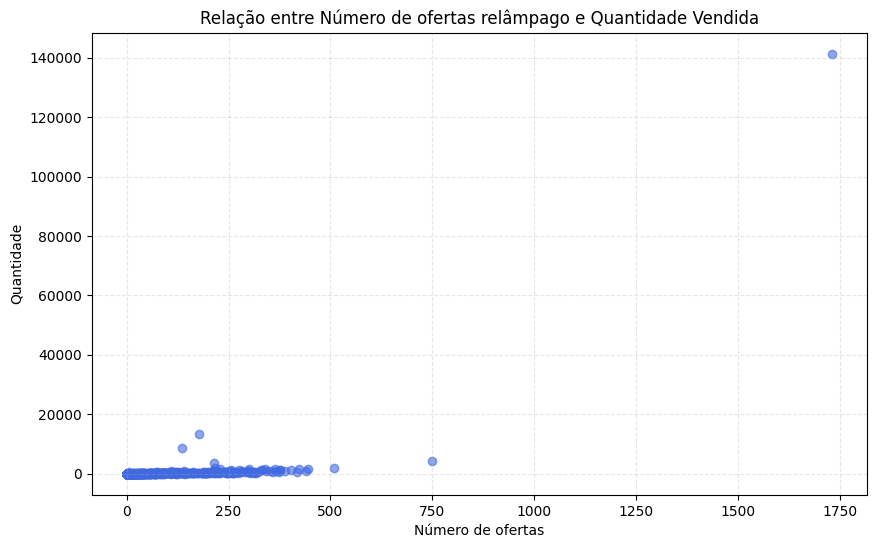

In [169]:
plt.figure(figsize=(10, 6))
plt.scatter(
    x=amount_by_product['N_OFFERS'],
    y=amount_by_product['SOLD_QUANTITY'],
    alpha=0.6,
    color='royalblue'
)

plt.xlabel('Número de ofertas')
plt.ylabel('Quantidade')
plt.title('Relação entre Número de ofertas relâmpago e Quantidade Vendida')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# Possíveis próximos passos:



*   Obter dados de custo dos produtos, para analisar a margem de lucro que as promoções geraram
*   Analisar dados da % de desconto que foi aplicado para verificar se a precificação foi eficaz
*   Realizar um planejamento de promoções, fazendo uma previsão de demanda levando-se em conta a elasticidade do preço de acordo com o desconto dado a cada produto ou categoria de produto

